## Text Mining & Image Recognition
### Laboratorio # 2

Instrucciones: A continuacion ver´a una lista de ejercicios que debe completar para poder entregar el laboratorio #1. Su soluci´on deber´a realizarla en un mismo Notebook indicando cada uno de los ejercicios y la salida correspondiente. Al finalizar deber´a subir su soluci´on a su repositorio de github y entregar en el GES link de dicho repositorio.

**Problema #1:**    
Desarrolle una funcion que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.


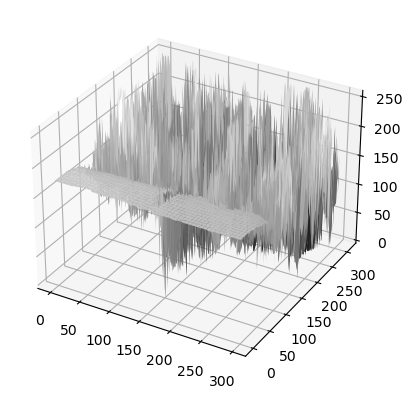

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def show_image_3d(image):
    height, width = image.shape

    x = np.arange(0, width, 1)
    y = np.arange(0, height, 1)
    X, Y = np.meshgrid(x, y)

    Z = image

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='gray')

    plt.show()

# Cargar tu imagen en escala de grises
img = 'paris.jpeg'
image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen en 3D
show_image_3d(image)



----

**Problema #2:**    
Implemente una funcion para cada una de las transformaciones vistas en clase: negativa, lineal,
logarıtmica y exponencial

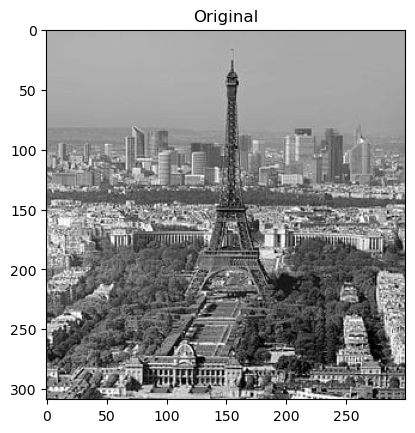

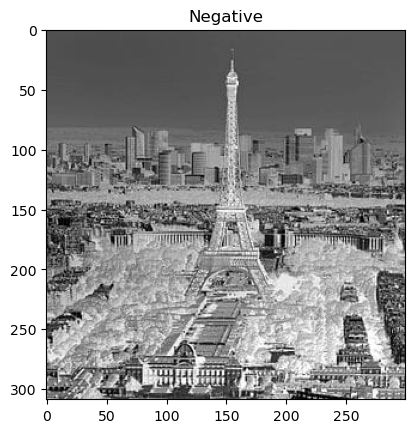

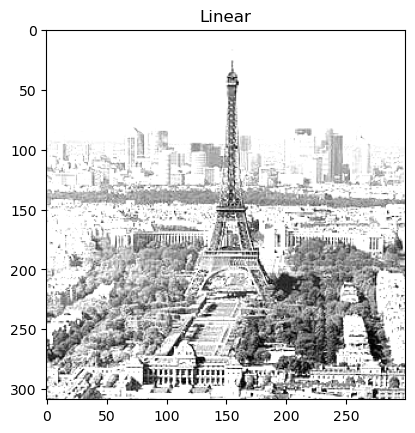

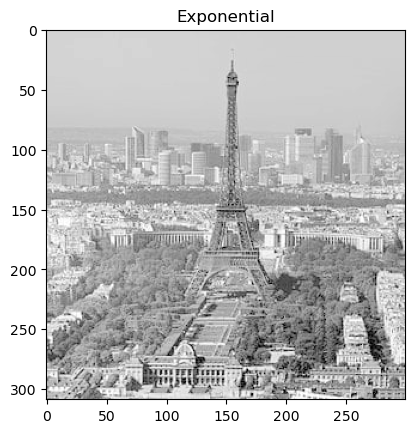

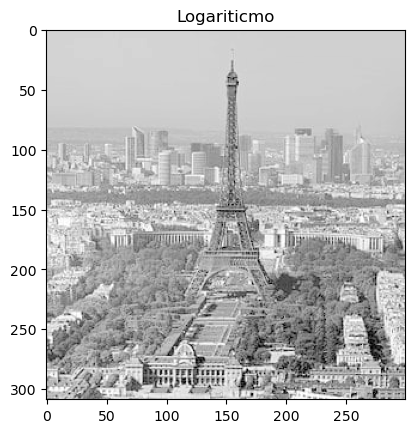

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para aplicar la transformación negativa a una imagen
def negative_transform(image):
    negative_image = 255 - image
    return negative_image

# Función para aplicar la transformación lineal a una imagen
def linear_transform(image, alpha, beta):
    linear_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return linear_image

# Función para aplicar la transformación logarítmica a una imagen
def logarithmic_transform(image, c=1):
    # Normalizar la imagen al rango [0, 1]
    image_normalized = cv2.normalize(image, None, 0, 1, cv2.NORM_MINMAX)
    # Aplicar la transformación logarítmica
    log_image = c * np.log1p(image_normalized)
    # Escalar los valores nuevamente al rango [0, 255]
    log_image = cv2.normalize(log_image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    

# Función para aplicar la transformación exponencial a una imagen
def exponential_transform(image, gamma):
    exp_image = np.power(image, gamma)
    exp_image = cv2.normalize(exp_image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return exp_image

# Cargar una imagen en escala de grises
img = 'paris.jpeg'
gray_image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)

# Aplicar las transformaciones y mostrar las imágenes resultantes
negative_image = negative_transform(gray_image)
linear_image = linear_transform(gray_image, alpha=1.5, beta=50)
log_image = logarithmic_transform(gray_image, c=50)
exp_image = exponential_transform(gray_image, gamma=0.5)


plt.imshow(gray_image, cmap='gray')
plt.title('Original')
plt.show()

plt.imshow(negative_image, cmap='gray')
plt.title('Negative')
plt.show()

plt.imshow(linear_image, cmap='gray')
plt.title('Linear')
plt.show()

plt.imshow(exp_image, cmap='gray')
plt.title('Exponential')
plt.show()

plt.imshow(exp_image, cmap='gray')
plt.title('Logariticmo')
plt.show()



----

**Problema #3:**    
Desarrolle una funcion que dada dos imagenes a color, realice las operaciones SUMA, RESTA, AND,
OR , XOR con ambas im´agenes recuerde que para realizar las operaciones l´ogicas es necesario pasar
la imagen a escala de grises y luego binarizarla

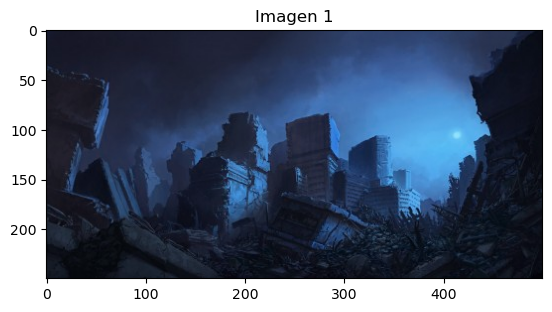

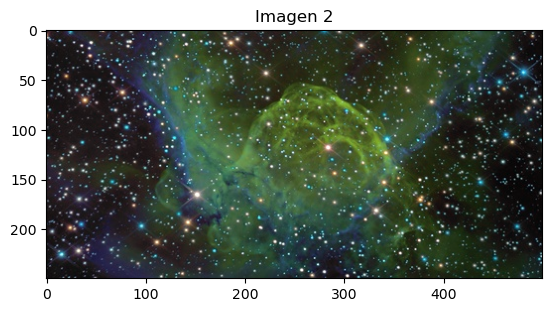

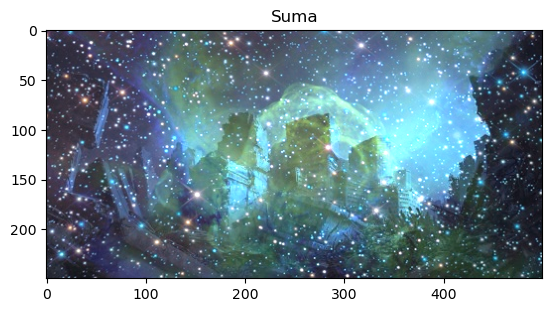

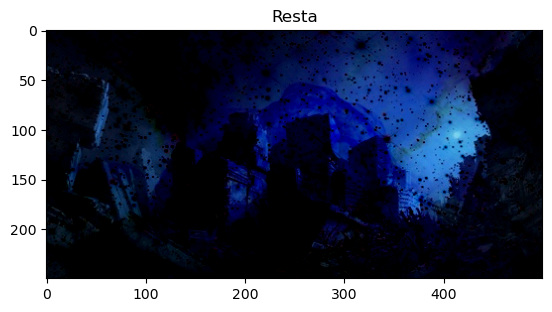

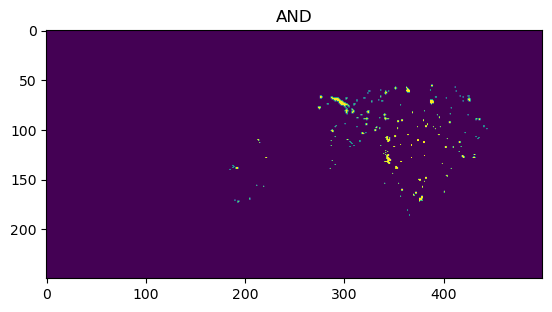

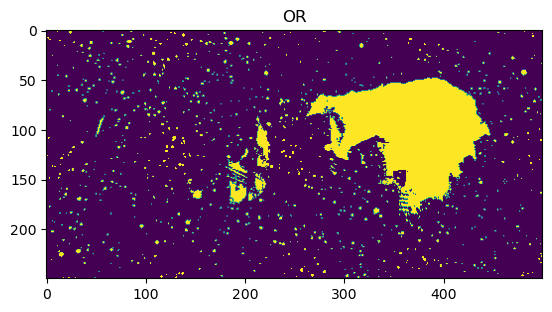

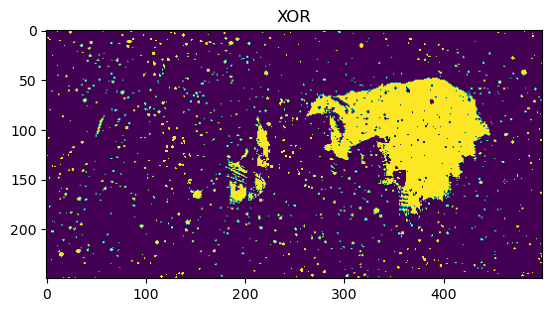

: 

In [79]:
import cv2
import numpy as np

def img_operations(image1, image2):
    # Suma de imágenes
    suma_result = cv2.add(image1, image2)
#    plt.imshow(suma)
#    plt.show()

    # Resta de imágenes
    resta_result = cv2.subtract(image1, image2)

    # Convertir imágenes a escala de grises
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Binarizar imágenes
    _, bin_image1 = cv2.threshold(gray_image1, 127, 255, cv2.THRESH_BINARY)
    _, bin_image2 = cv2.threshold(gray_image2, 127, 255, cv2.THRESH_BINARY)

    # Operaciones lógicas AND, OR, XOR
    and_result = cv2.bitwise_and(bin_image1, bin_image2)
    or_result = cv2.bitwise_or(bin_image1, bin_image2)
    xor_result = cv2.bitwise_xor(bin_image1, bin_image2)

    return suma_result, resta_result, and_result, or_result, xor_result

# Cargar las dos imágenes
img1 = 'im1.jpg'
img2 = 'im2.jpg'
image1 = cv2.imread(img1)
image2 = cv2.imread(img2)
plt.imshow(image1)
plt.title("Imagen 1")
plt.show()
plt.imshow(image2)
plt.title("Imagen 2")
plt.show()

# Realizar las operaciones
suma, resta, and_result, or_result, xor_result = img_operations(image1, image2)

# Mostrar las imágenes resultantes
plt.imshow(suma)
plt.title("Suma")
plt.show()

plt.imshow(resta)
plt.title("Resta")
plt.show()

plt.imshow(and_result)
plt.title("AND")
plt.show()

plt.imshow(or_result)
plt.title("OR")
plt.show()

plt.imshow(xor_result)
plt.title("XOR")
plt.show()



----

**Problema #4:**
Realice una comparaci´on entre el algoritmo de Canny, el operador de Sobel y el operador Laplaciano
para encontrar los bordes en una imagen, para este ejercicio puede utilizar las funciones de openCV
y cualquier imagen, como entregable debe mostrar una comparaciA˜n entre los tres enfoques con
una tabla donde se muestre las ventajas y desventajas de cada enfoque.

----